In [1]:
import pandas as pd
import numpy as np
from prac_code.value import Value
from prac_code.plotter import Plotter
from sympy import tan
from math import pi

# Нахождение удельных электропроводностей материала образцов

Убедимся, что с пустым трансформатором все хорошо

In [2]:
Empty = pd.read_csv("Kats201/Empty.txt", sep="\t")
Empty["deg"].describe()

count    100.000000
mean     -88.378000
std       17.251131
min     -141.700000
25%      -90.925000
50%      -90.100000
75%      -89.375000
max       46.400000
Name: deg, dtype: float64

In [3]:
Empty.head(20)

,Hz,Vrms,dBV,deg
0,10.0,0.005,-46.559,-6.2
1,20.0,0.006,-44.899,-141.7
2,30.0,0.007,-43.441,-100.3
3,40.0,0.008,-42.324,46.4
4,50.0,0.012,-38.116,-113.4
5,60.0,0.009,-40.491,-79.7
6,70.0,0.012,-38.666,-83.6
7,80.0,0.009,-41.014,-87.7
8,90.0,0.013,-37.568,-86.6
9,100.0,0.023,-32.733,-79.1


ну, пойдет, хотя в начале все не очень хорошо

## Медь

In [4]:
Cu = pd.read_csv("Kats201/Cu.txt", sep="\t")

In [5]:
Cu.deg = Cu.deg.apply(Value) + Value(values=[0.0], syst=0.1)
Cu.Hz = Cu.Hz.apply(Value) + Value(values=[0.0], syst=0.1)

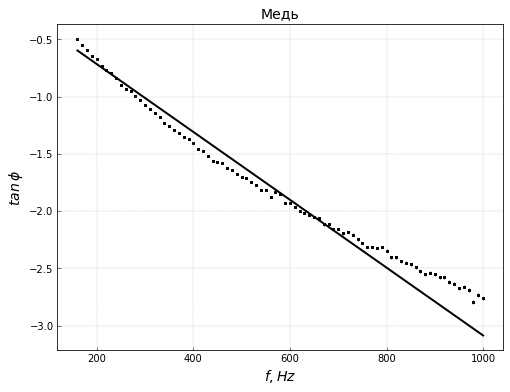

In [6]:
line, *_ = Plotter(draw_legend=False).set_name("Медь").set_title("Медь").set_y_name("$tan\:\phi$").set_x_name(
        "$f, Hz$"). \
        add_line(Plotter.get_new_line(y_value=(Cu.deg / 180 * pi).apply(lambda v: v.use_func(tan))[15::], x_value=Cu.Hz[15::],
                                      draw_error=True, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [7]:
Acu = Value(values=[line.a], syst=line.sigma_a)
sigmacu = Acu * 6.0e+7 / Acu

## Алюминий

In [8]:
Al = pd.read_csv("Kats201/Al.txt", sep="\t")

In [9]:
Al.deg = Al.deg.apply(Value) + Value(values=[0.0], syst=0.1)
Al.Hz = Al.Hz.apply(Value) + Value(values=[0.0], syst=0.1)

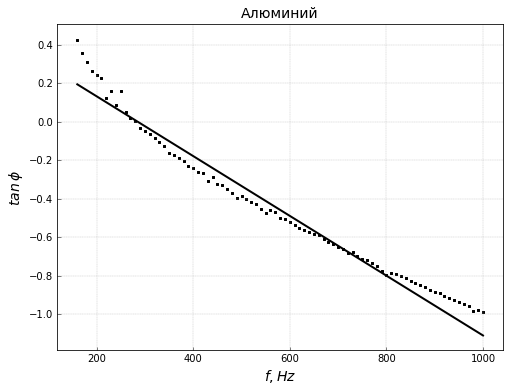

In [10]:
line, *_ = Plotter(draw_legend=False).set_name("Алюминий").set_title("Алюминий").set_y_name("$tan\:\phi$").set_x_name(
        "$f, Hz$"). \
        add_line(Plotter.get_new_line(y_value=(Al.deg / 180 * pi).apply(lambda v: v.use_func(tan))[15::], x_value=Al.Hz[15::],
                                      draw_error=True, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [11]:
Aal = Value(values=[line.a], syst=line.sigma_a)
print("sigma = {}".format(60 * Aal / Acu))
sigmaal = Aal * 6.0e+7 / Acu

sigma = 31.5 ± 0.8


## Латунь

In [12]:
Brass = pd.read_csv("Kats201/Brass.txt", sep="\t")

In [13]:
Brass.deg = Brass.deg.apply(Value) + Value(values=[0.0], syst=0.1)
Brass.Hz = Brass.Hz.apply(Value) + Value(values=[0.0], syst=0.1)

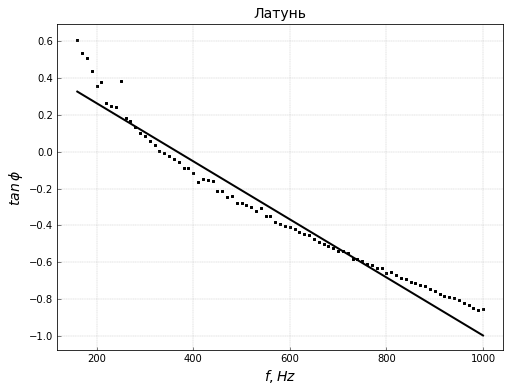

In [14]:
line, *_ = Plotter(draw_legend=False).set_name("Латунь").set_title("Латунь").set_y_name("$tan\:\phi$").set_x_name(
        "$f, Hz$"). \
        add_line(Plotter.get_new_line(y_value=(Brass.deg / 180 * pi).apply(lambda v: v.use_func(tan))[15::], x_value=Brass.Hz[15::],
                                      draw_error=True, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [15]:
Abrass = Value(values=[line.a], syst=line.sigma_a)
print("sigma = {}".format(60 * Abrass / Acu))
sigmabrass = Abrass * 6.0e+7 / Acu

sigma = 31.9 ± 0.9


## Железо

In [16]:
Fe = pd.read_csv("Kats201/Fe.txt", sep="\t")

In [17]:
Fe.deg = Fe.deg.apply(Value) + Value(values=[0.0], syst=0.1)
Fe.Hz = Fe.Hz.apply(Value) + Value(values=[0.0], syst=0.1)

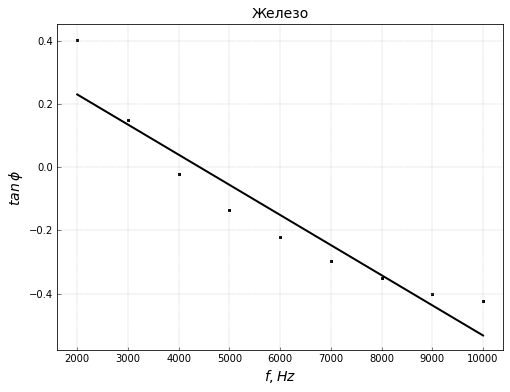

In [18]:
line, *_ = Plotter(draw_legend=False).set_name("Железо").set_title("Железо").set_y_name("$tan\:\phi$").set_x_name(
        "$f, Hz$"). \
        add_line(Plotter.get_new_line(y_value=(Fe.deg / 180 * pi).apply(lambda v: v.use_func(tan))[10::], x_value=Fe.Hz[10::],
                                      draw_error=True, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [19]:
Afe = Value(values=[line.a], syst=line.sigma_a)
print("sigma = {}".format(60 * Afe / Acu))
sigmafe = Afe * 6.0e+7 / Acu

sigma = 1.9 ± 0.2


## Титан

In [20]:
Ti = pd.read_csv("Kats201/Ti.txt", sep="\t")

In [21]:
Ti.deg = Ti.deg.apply(Value) + Value(values=[0.0], syst=0.1)
Ti.Hz = Ti.Hz.apply(Value) + Value(values=[0.0], syst=0.1)

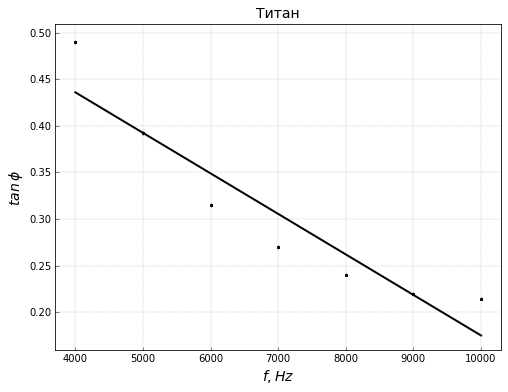

In [22]:
line, *_ = Plotter(draw_legend=False).set_name("Титан").set_title("Титан").set_y_name("$tan\:\phi$").set_x_name(
        "$f, Hz$"). \
        add_line(Plotter.get_new_line(y_value=(Ti.deg / 180 * pi).apply(lambda v: v.use_func(tan))[12::], x_value=Ti.Hz[12::],
                                      draw_error=True, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [23]:
Ati = Value(values=[line.a], syst=line.sigma_a)
print("sigma = {}".format(60 * Ati / Acu))
sigmati = Ati * 6.0e+7 / Acu

sigma = 0.88 ± 0.15


## Свинец

In [24]:
Pb = pd.read_csv("Kats201/Pb.txt", sep="\t")

In [25]:
Pb.deg = Pb.deg.apply(Value) + Value(values=[0.0], syst=0.1)
Pb.Hz = Pb.Hz.apply(Value) + Value(values=[0.0], syst=0.1)

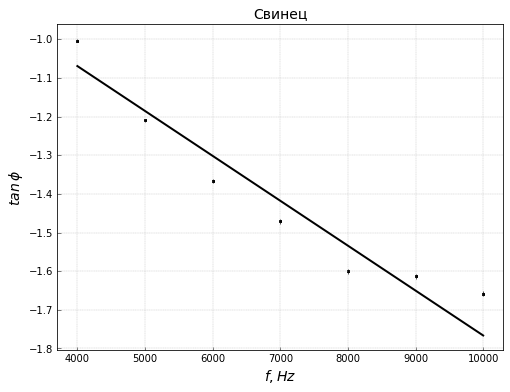

In [26]:
line, *_ = Plotter(draw_legend=False).set_name("Свинец").set_title("Свинец").set_y_name("$tan\:\phi$").set_x_name(
        "$f, Hz$"). \
        add_line(Plotter.get_new_line(y_value=(Pb.deg / 180 * pi).apply(lambda v: v.use_func(tan))[12::], x_value=Pb.Hz[12::],
                                      draw_error=True, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [27]:
Apb = Value(values=[line.a], syst=line.sigma_a)
print("sigma = {}".format(60 * Apb / Acu))
sigmapb = Apb * 6.0e+7 / Acu

sigma = 2.4 ± 0.3


# Оценка глубины проникновения переменного электромагнитного поля в проводнике

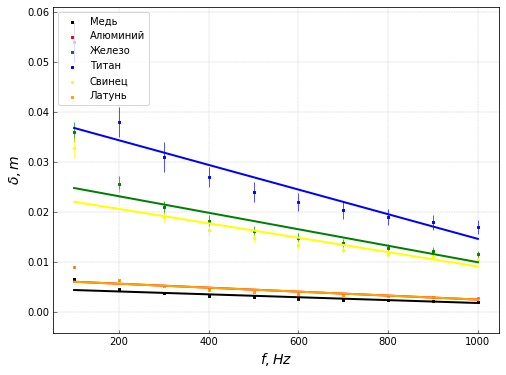

In [29]:
sigma = [sigmacu + Value(values=[0.0], syst=0.1), sigmaal, sigmafe, sigmati, sigmapb, sigmabrass]
legend = ["Медь", "Алюминий", "Железо", "Титан", "Свинец", "Латунь"]
color = ["black", "red", "green", "blue", "yellow", "orange"]

plot = Plotter(draw_legend=True).set_name("task2").set_title("").set_y_name("$\delta, m$").set_x_name("$f, Hz$")
f = np.vectorize(Value)(np.linspace(100, 1000, 10))
mu = 1.0
mu0 = 4 * pi * 1.0e-07

for c, s, leg in zip(color, sigma, legend):
    plot = plot.add_line(Plotter.get_new_line(y_value=(f * mu * mu0 * pi * s) ** (-0.5), x_value=f,
                                      draw_error=True, legend=leg, fit=True, color=c, marker="s"))
fit = plot.plot(show=True, save=True)